# Classificação dos fungos utilizando-se de técnicas de processamento


In [57]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import time

## Colocamos a imagens para tons de cinza

In [58]:
# Colocamos o caminho do dataset e o tamanho da imagem
Dataset_path = "defungi_dataset"
Image_size = (128, 128)

data = []
labels = []

classes_names = [d for d in os.listdir(Dataset_path) if os.path.isdir(os.path.join(Dataset_path, d))]
label_mapping = {name: i for i, name in enumerate(classes_names)}

for nome_classe,label_id in label_mapping.items():
    class_path = os.path.join(Dataset_path, nome_classe)
    for nome_imagem in os.listdir(class_path):
        image_path = os.path.join(class_path,nome_imagem)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_path}")
            continue

        resized_image = cv2.resize(image, Image_size)
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        data.append(gray_image)
        labels.append(label_id)

In [59]:
# adding a hashmap to store the data by class - Adicionado um hashmap para armazenar os dados por classe
data_by_class = {label: [] for label in label_mapping.values()}
for img, label in zip(data, labels):
    data_by_class[label].append(img)



## Exibindo 10 imagens de cada label

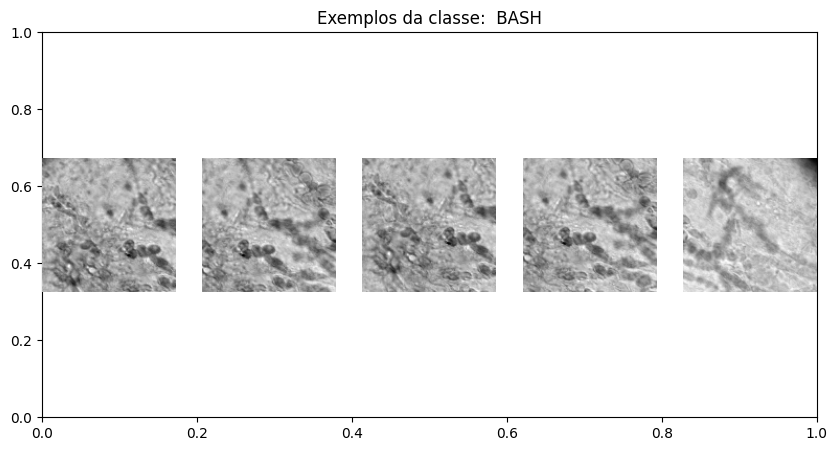

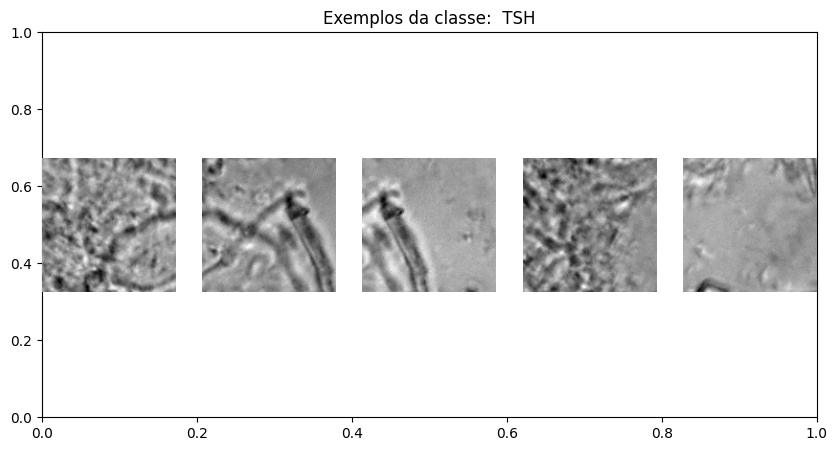

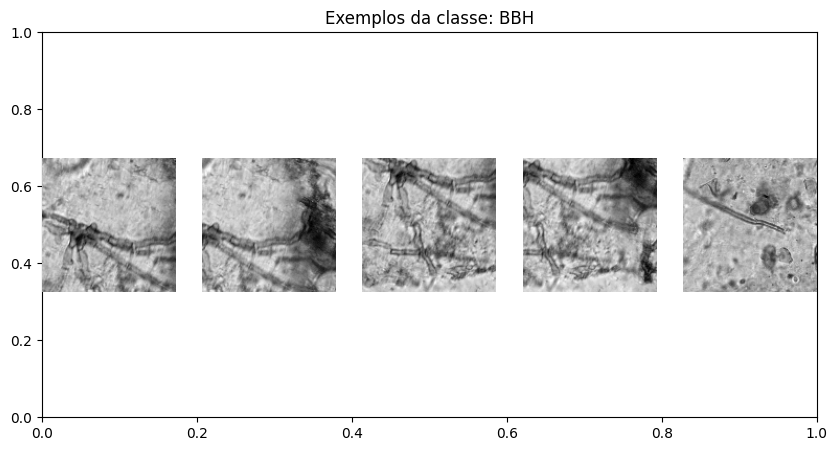

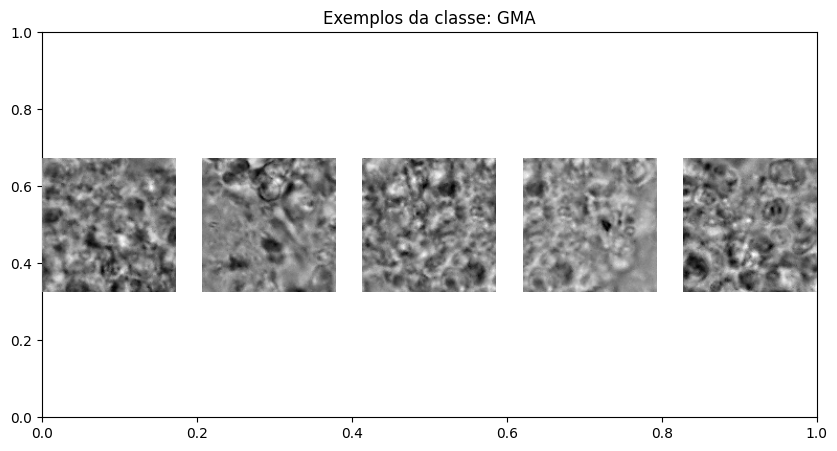

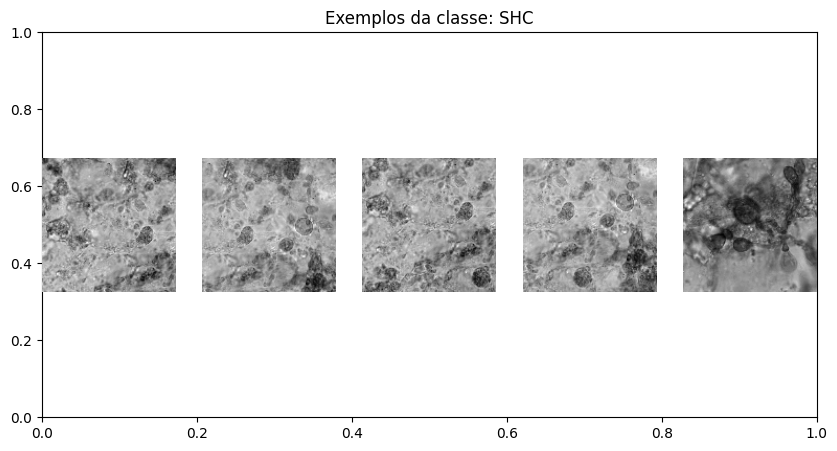

In [60]:
for label, images in data_by_class.items():
    if len(images) > 0:
        plt.figure(figsize=(10, 5))
        plt.title(f"Exemplos da classe: {classes_names[label]}")
        for i in range(min(5, len(images))):
            plt.subplot(1, 5, i + 1)
            plt.imshow(images[i], cmap='gray')
            plt.axis('off')
        plt.show()

## Ajustando o brilho de cada imagem 

In [61]:
# pegar as 
#mostrar os indicices das classes
print("Classes e seus respectivos índices:")
for name, idx in label_mapping.items():
    print(f"{name}: {idx}")

#10 primeiras imagens de cada classe
bash = [i for i in range(len(data)) if labels[i] == 0][:10]
tsh = [i for i in range(len(data)) if labels[i] == 1][:10]
bbh = [i for i in range(len(data)) if labels[i] == 2][:10]
gma = [i for i in range(len(data)) if labels[i] == 3][:10]
shc = [i for i in range(len(data)) if labels[i] == 4][:10]



Classes e seus respectivos índices:
 BASH: 0
 TSH: 1
BBH: 2
GMA: 3
SHC: 4


### Aumentando o brilho

In [62]:
#aumento do brilho das imagens
def increase_brightness(list : list):
    """Aumenta o brilho da imagem."""
    for i in list:
        data[i] = cv2.convertScaleAbs(data[i], beta=60)
        print(f"Aumento do brilho da imagem {i} concluído.")

for i in [bash, tsh, bbh, gma, shc]:
    increase_brightness(i)

Aumento do brilho da imagem 0 concluído.
Aumento do brilho da imagem 1 concluído.
Aumento do brilho da imagem 2 concluído.
Aumento do brilho da imagem 3 concluído.
Aumento do brilho da imagem 4 concluído.
Aumento do brilho da imagem 5 concluído.
Aumento do brilho da imagem 6 concluído.
Aumento do brilho da imagem 7 concluído.
Aumento do brilho da imagem 8 concluído.
Aumento do brilho da imagem 9 concluído.
Aumento do brilho da imagem 2334 concluído.
Aumento do brilho da imagem 2335 concluído.
Aumento do brilho da imagem 2336 concluído.
Aumento do brilho da imagem 2337 concluído.
Aumento do brilho da imagem 2338 concluído.
Aumento do brilho da imagem 2339 concluído.
Aumento do brilho da imagem 2340 concluído.
Aumento do brilho da imagem 2341 concluído.
Aumento do brilho da imagem 2342 concluído.
Aumento do brilho da imagem 2343 concluído.
Aumento do brilho da imagem 6738 concluído.
Aumento do brilho da imagem 6739 concluído.
Aumento do brilho da imagem 6740 concluído.
Aumento do brilho 

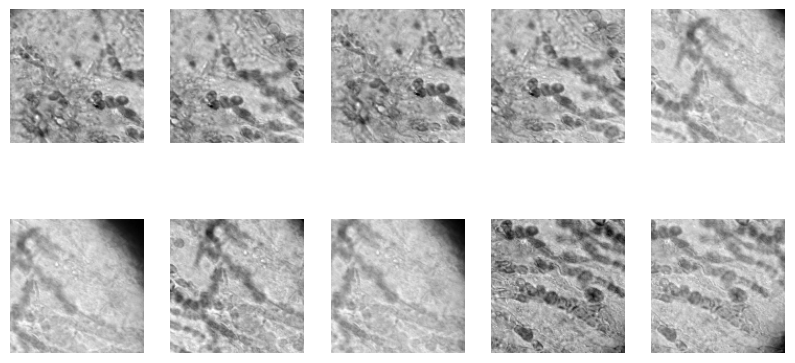

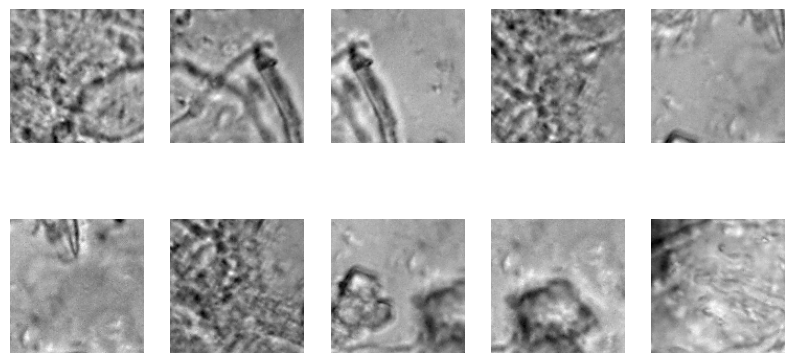

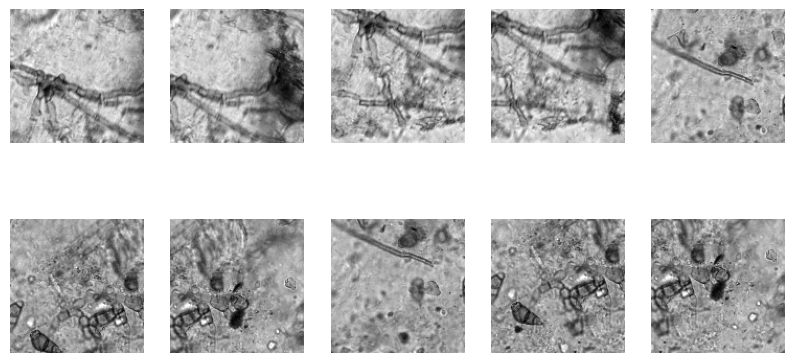

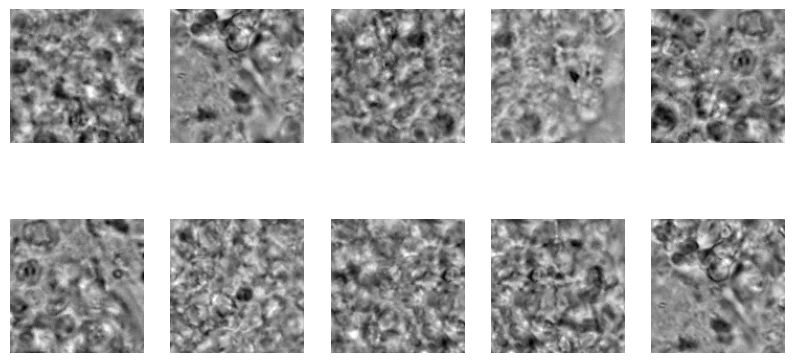

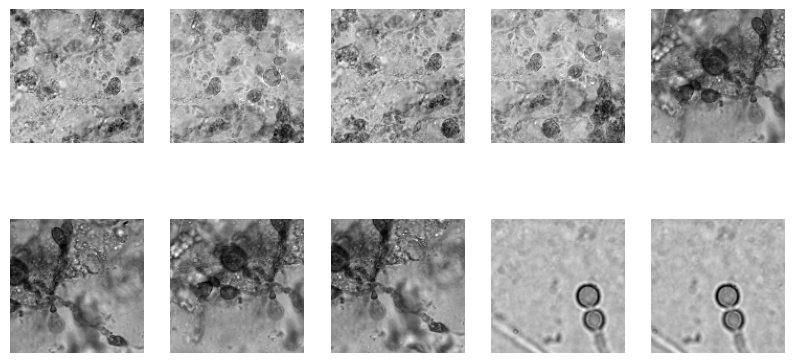

In [63]:
#mostrar as imagens com brilho aumentado
for i in [bash, tsh, bbh, gma, shc]:
    plt.figure(figsize=(10, 5))
    for j in range(len(i)):
        plt.subplot(2, 5, j + 1)
        plt.imshow(data[i[j]], cmap='gray')
        plt.axis('off')
    plt.show()

### Diminuindo o brilho

In [64]:
# def decrease_brightness(list : list):
#     """Aumenta o brilho da imagem."""
#     for i in list:
#         data[i] = cv2.convertScaleAbs(data[i], beta=-60)
#         print(f"Diminuição do brilho da imagem {i} concluído.")

# for i in [bash, tsh, bbh, gma, shc]:
#     decrease_brightness(i)

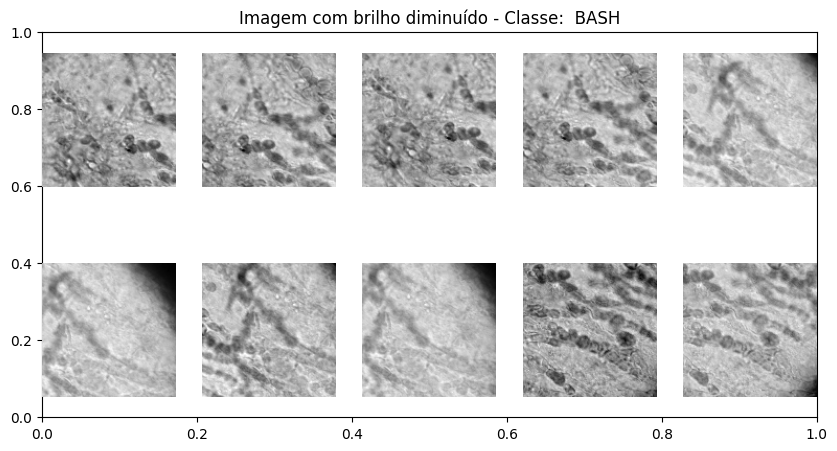

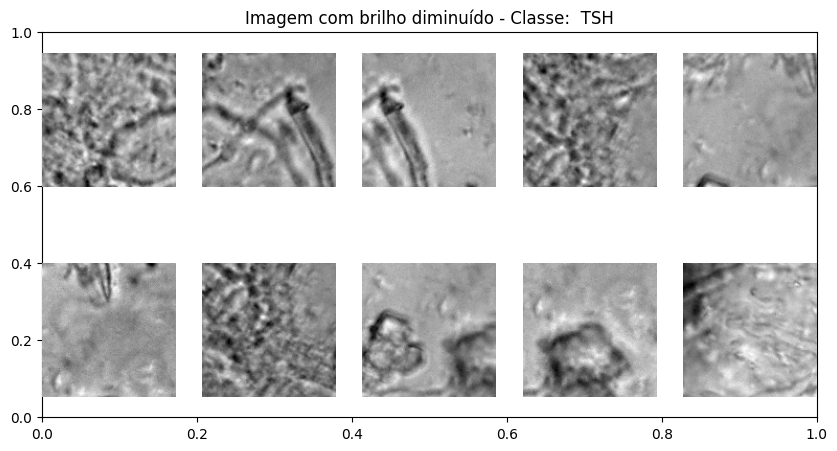

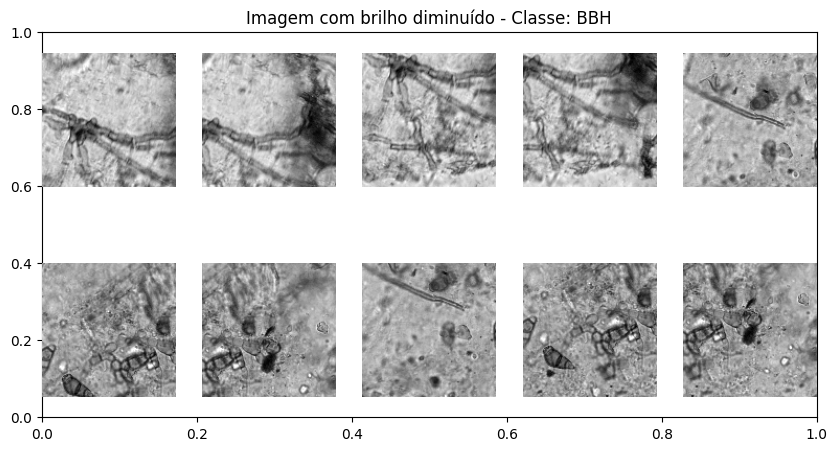

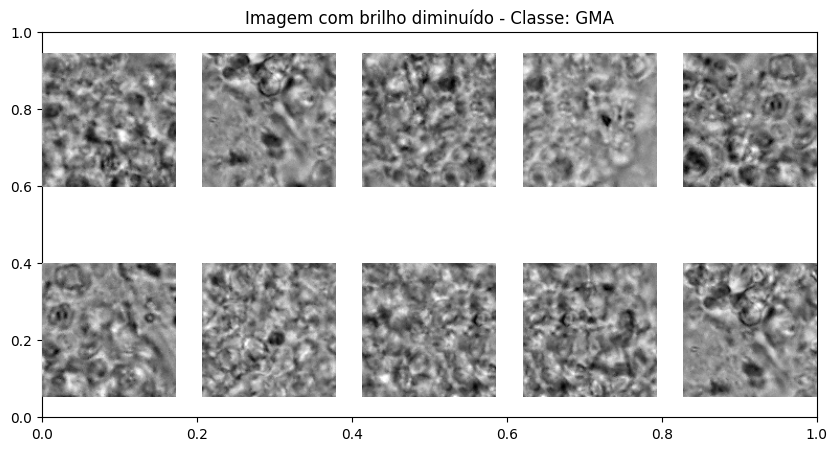

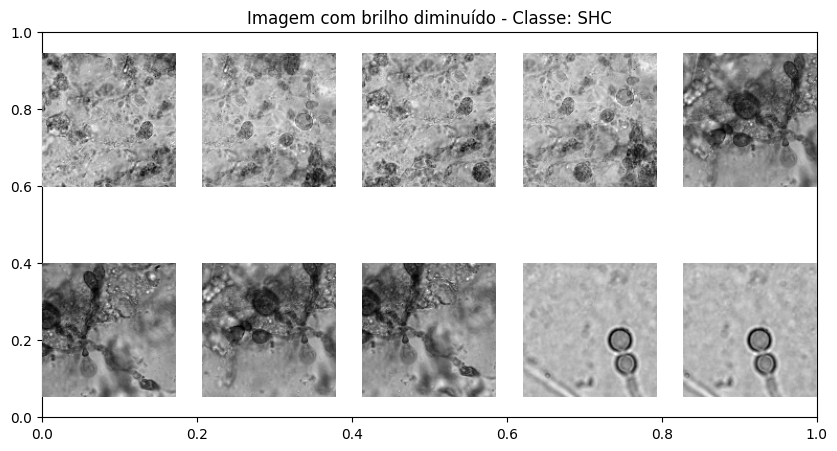

In [65]:
#mostrar as imagens com brilho aumentado
for i in [bash, tsh, bbh, gma, shc]:
    plt.figure(figsize=(10, 5))
    plt.title(f"Imagem com brilho diminuído - Classe: {classes_names[labels[i[j]]]}")
    for j in range(len(i)):
        plt.subplot(2, 5, j + 1)
        plt.imshow(data[i[j]], cmap='gray')
        plt.axis('off')
    plt.show()

In [68]:
#Passando o filtro da média
def apply_mean_filter(list: list):
    """Aplica o filtro da média na imagem."""
    for i in list:
        data[i] = cv2.medianBlur(data[i], 3)
        print(f"Filtro da média aplicado na imagem {i}.")

for i in [bash, tsh, bbh, gma, shc]:
    apply_mean_filter(i)

Filtro da média aplicado na imagem 0.
Filtro da média aplicado na imagem 1.
Filtro da média aplicado na imagem 2.
Filtro da média aplicado na imagem 3.
Filtro da média aplicado na imagem 4.
Filtro da média aplicado na imagem 5.
Filtro da média aplicado na imagem 6.
Filtro da média aplicado na imagem 7.
Filtro da média aplicado na imagem 8.
Filtro da média aplicado na imagem 9.
Filtro da média aplicado na imagem 2334.
Filtro da média aplicado na imagem 2335.
Filtro da média aplicado na imagem 2336.
Filtro da média aplicado na imagem 2337.
Filtro da média aplicado na imagem 2338.
Filtro da média aplicado na imagem 2339.
Filtro da média aplicado na imagem 2340.
Filtro da média aplicado na imagem 2341.
Filtro da média aplicado na imagem 2342.
Filtro da média aplicado na imagem 2343.
Filtro da média aplicado na imagem 6738.
Filtro da média aplicado na imagem 6739.
Filtro da média aplicado na imagem 6740.
Filtro da média aplicado na imagem 6741.
Filtro da média aplicado na imagem 6742.
Filtr

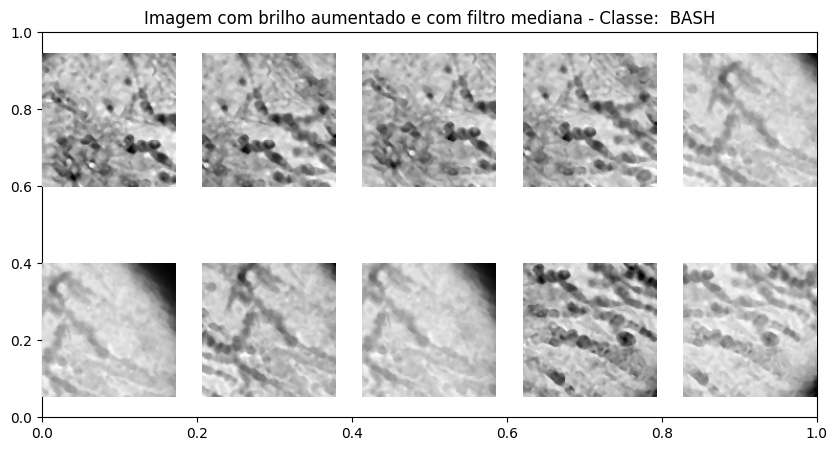

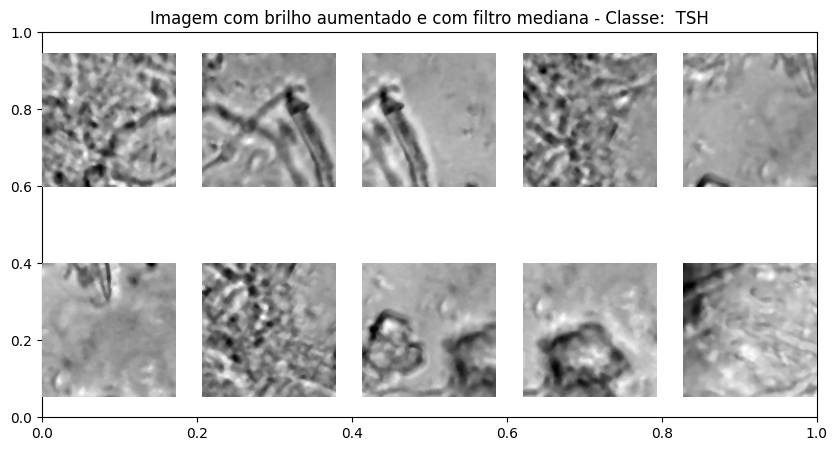

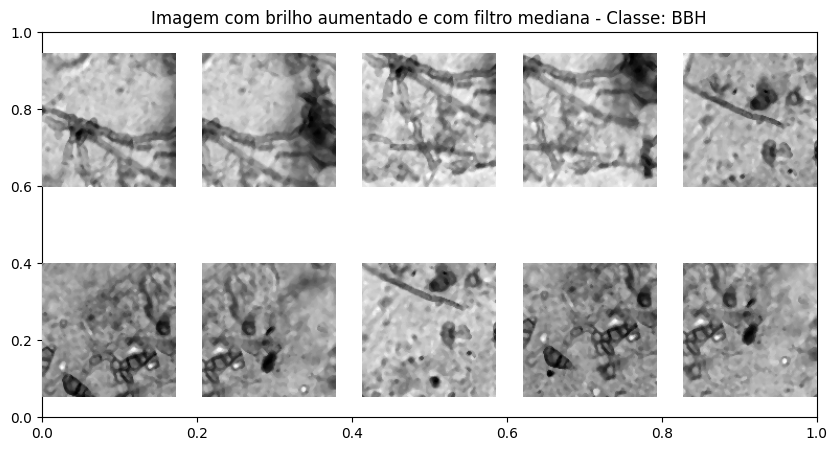

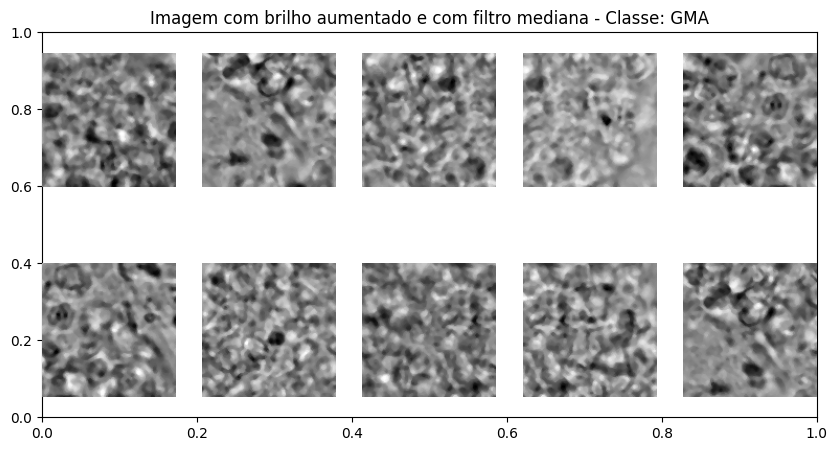

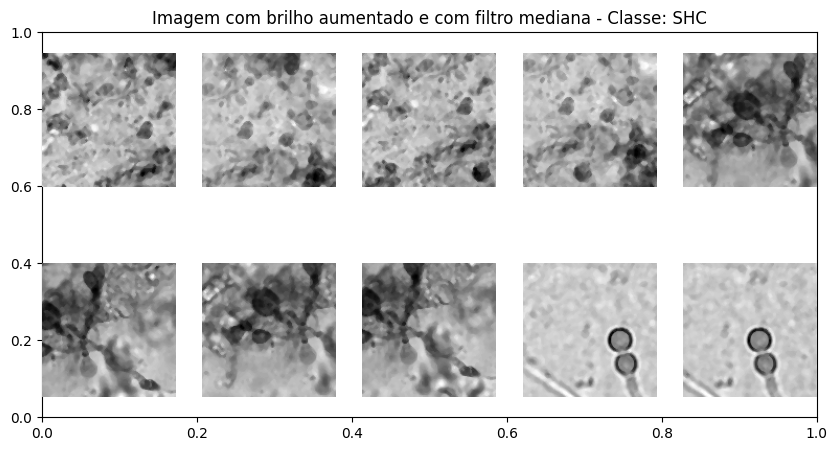

In [69]:
for i in [bash, tsh, bbh, gma, shc]:
    plt.figure(figsize=(10, 5))
    plt.title(f"Imagem com brilho aumentado e com filtro mediana - Classe: {classes_names[labels[i[j]]]}")
    for j in range(len(i)):
        plt.subplot(2, 5, j + 1)
        plt.imshow(data[i[j]], cmap='gray')
        plt.axis('off')
    plt.show()